## Observations and Insights 
1) It was clear that Capomulin was the most effective drug regime.

2) Capomulin and Ramicane both had higher numbers of mice completing the course of drugs. This could be a result of the drugs performance allowing the mice to continue longer with the regime.

3) For the drug Capomulin, the correlation of mouse weight vs the average tumor volume was 0.84. This indicates that there is a positive correlation between the two sets of data, suggesting that the weight of a mouse could influence the effectiveness of the drug regime.

4) From the boxplots it can be seen that Capomulin and Ramicane were the two most effective regimens as all of their mice had significantlly lower final volumes of their tumors compared to the next two drug regimens, Infubinol and Ceftamin.

5) While most mice showed tumor volume increase for the Infubinol regimen, there was one mouse that had a reduction in tumor growth in the study. This is a potential outlier within the study. 

In [290]:
! pip install scipy
! pip install autopep8

In [291]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import autopep8

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined_df = pd.merge(
    mouse_metadata, study_results, how="inner", on="Mouse ID")


# Display the data table for preview
data_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [292]:
# Checking the number of mice.
mice = data_combined_df['Mouse ID'].value_counts()
numberofmice = len(mice)
numberofmice

249

In [293]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicatemice = data_combined_df.loc[data_combined_df.duplicated(
    subset=['Mouse ID', 'Timepoint', ]), 'Mouse ID'].unique()
print(duplicatemice)

['g989']


In [294]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_g989 = data_combined_df[data_combined_df.duplicated(
    ['Mouse ID', 'Timepoint'])]
duplicate_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [295]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_combined_df[data_combined_df['Mouse ID'].isin(
    duplicatemice) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [296]:
# Checking the number of mice in the clean DataFrame.
cleanmice = clean_df['Mouse ID'].value_counts()
numberofcleanmice = len(cleanmice)
numberofcleanmice

248

## Summary Statistics

In [297]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
# print (mean)
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
# print (median)
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
# print (variance)
std_dv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
# print (std_dv)
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# print (sem)

summary_df = pd.DataFrame({"Mean": mean, "Median": median,
                           "Variance": variance, "Standard Deviation": std_dv, "SEM": sem})
summary_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [298]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_group_by = clean_df.groupby('Drug Regimen')
summary_df_2 = single_group_by.agg(['mean', 'median', 'var', 'std', 'sem'])[
    "Tumor Volume (mm3)"]
summary_df_2
# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

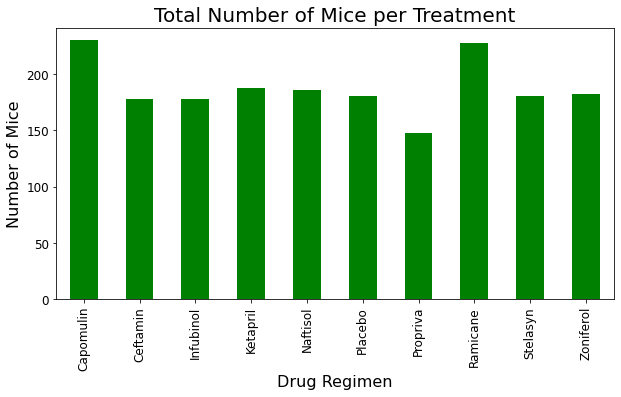

In [299]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
micepertreatment = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
# micepertreatment

plot_pandas = micepertreatment.plot.bar(
    figsize=(10, 5), color='g', fontsize=12)
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Number of Mice", fontsize=16)
plt.title("Total Number of Mice per Treatment", fontsize=20)

plt.show()

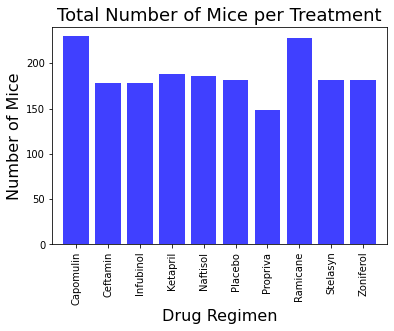

In [300]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = summary_df.index.tolist()
# x_axis
y_axis = micepertreatment.tolist()
# y_axis

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 10)

plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Number of Mice", fontsize=16)
plt.title("Total Number of Mice per Treatment", fontsize=18)

plt.bar(x_axis, y_axis, color='b', alpha=.75, align="center")
plt.xticks(tick_locations, x_axis, rotation=90)


plt.show()

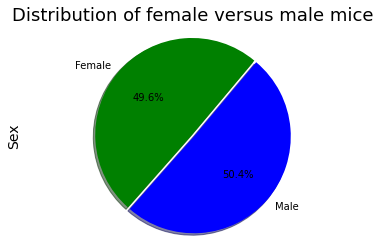

In [301]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#  Group by gender and get the number to plot
genderpercentage = clean_df["Mouse ID"].groupby([clean_df["Sex"]]).nunique()
genderpercentage


list_sex = genderpercentage.keys()
list_sex
explode = [0.025, 0]
colors = ['green', 'blue']
genderpercentage.plot(kind='pie', y=list_sex, autopct='%1.1f%%',
                      explode=explode, colors=colors, startangle=50, shadow=True)

plt.title('Distribution of female versus male mice', fontsize=18)
plt.axis("equal")
plt.ylabel('Sex', fontsize=14)

plt.show()

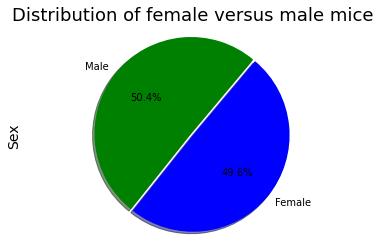

In [302]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# mouse count per sex
sex_count = clean_df.loc[(clean_df["Timepoint"] == 0), :]
sex_count

# Labels for the sections of our pie chart
labels = sex_count["Sex"].unique()
labels

# The values of each section of the pie chart
mouse_sex = sex_count["Sex"].value_counts().tolist()
mouse_sex


# plot using pyplot
plt.pie(mouse_sex, labels=labels, autopct="%1.1f%%",
        explode=explode, colors=colors, startangle=50, shadow=True)
plt.title("Distribution of female versus male mice", fontsize=18)
plt.axis("equal")
plt.ylabel("Sex", fontsize=14)


plt.show()

## Quartiles, Outliers and Boxplots

In [303]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [304]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Vol_last = pd.merge(last_timepoint, data_combined_df,
                    on=("Mouse ID", "Timepoint"), how="left")
Vol_last

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [305]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [306]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
tumor_vol

[]

In [307]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.


for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorsize = Vol_last[Vol_last['Drug Regimen']
                         == drug]['Tumor Volume (mm3)']

    # add subset
    tumor_vol.append(tumorsize)

    # Determine outliers using upper and lower bounds
    IQR = tumorsize.quantile(.75) - tumorsize.quantile(.25)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    lower_bound = (lowerq-(1.5*iqr))
    upper_bound = (upperq+(1.5*iqr))

    print(f" ")
    print(f"{drug} IQR:{IQR}")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")

 
Capomulin IQR:7.781863460000004
Values below 17.400437649999986 for Capomulin could be outliers.
Values above 93.49183637000002 for Capomulin could be outliers.
 
Ramicane IQR:9.098536719999998
Values below 17.400437649999986 for Ramicane could be outliers.
Values above 93.49183637000002 for Ramicane could be outliers.
 
Infubinol IQR:11.477135160000003
Values below 17.400437649999986 for Infubinol could be outliers.
Values above 93.49183637000002 for Infubinol could be outliers.
 
Ceftamin IQR:15.577752179999997
Values below 17.400437649999986 for Ceftamin could be outliers.
Values above 93.49183637000002 for Ceftamin could be outliers.


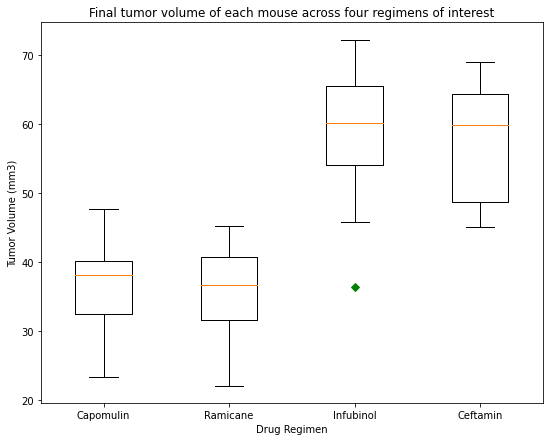

In [308]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax = plt.subplots(figsize=(9, 7))
ax.set_title(
    "Final tumor volume of each mouse across four regimens of interest")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_vol, labels=treatments, sym="gD")
plt.xticks([1, 2, 3, 4], treatments)

plt.show()

## Line and Scatter Plots

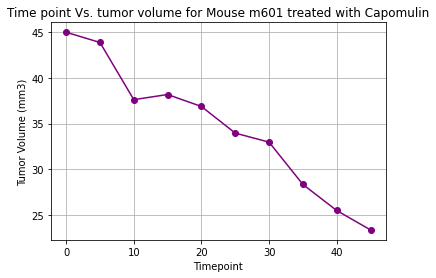

In [309]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
vol_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
vol_data

capomulins185_df = vol_data.loc[vol_data["Mouse ID"] == "s185"]
capomulins185_df

x_axis1 = capomulins185_df["Timepoint"]
tumor = capomulins185_df["Tumor Volume (mm3)"]

plt.plot(x_axis1, tumor, marker="o", color="purple", )
plt.title("Time point Vs. tumor volume for Mouse m601 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)


plt.show()

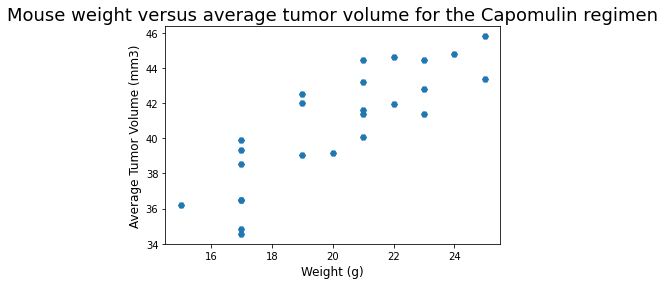

In [310]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouseavgweight = vol_data.groupby(["Mouse ID"]).mean()

plt.scatter(mouseavgweight["Weight (g)"],
            mouseavgweight["Tumor Volume (mm3)"], marker="H")


plt.title(
    "Mouse weight versus average tumor volume for the Capomulin regimen", fontsize=18)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84
The r-squared is 0.7088568047708717


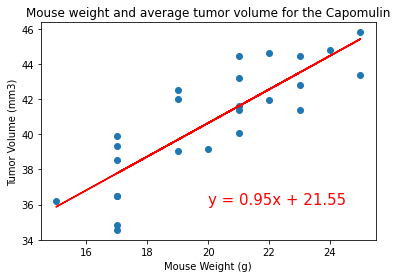

In [311]:
# Calculate the correlation coefficient and linear regression model

correlation = st.pearsonr(
    mouseavgweight["Weight (g)"], mouseavgweight["Tumor Volume (mm3)"])


# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouseavgweight["Weight (g)"]
y_values = mouseavgweight["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")
plt.title("Mouse weight and average tumor volume for the Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(
    f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")
print(f"The r-squared is {rvalue**2}")

plt.show()